In [10]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


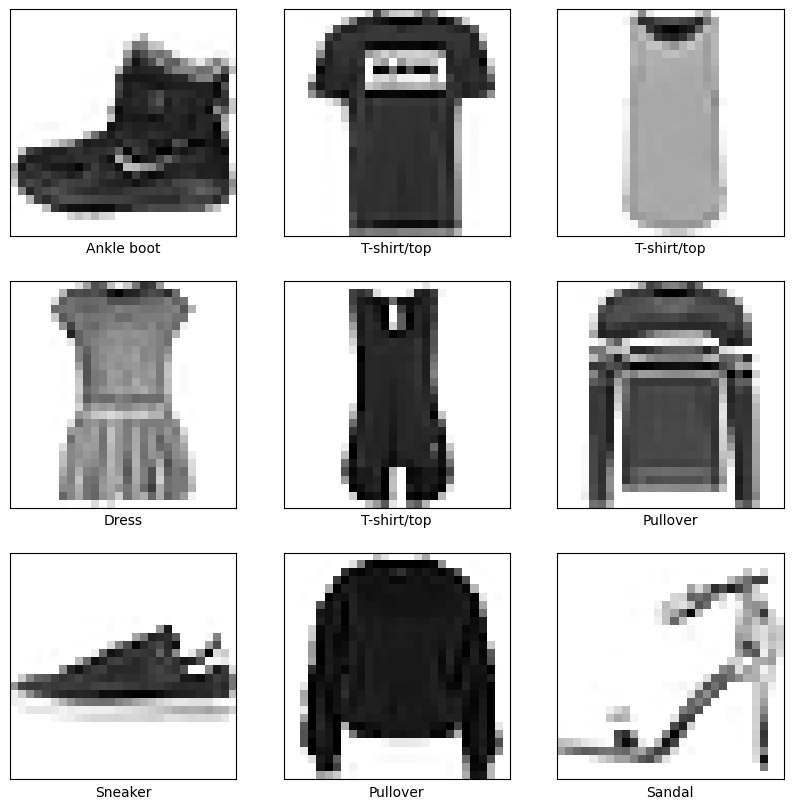

In [12]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Print dataset shapes
print(f"Training data shape: {train_images.shape}")
print(f"Testing data shape: {test_images.shape}")

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize the first few images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [14]:
# Normalize pixel values to range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to include a channel dimension (28x28x1)
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Check the shape
print(train_images.shape, test_images.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [20]:
# Define the CNN model with Input layer
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Input layer specifying the shape of the input
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output categories
])


In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7209 - loss: 0.7613 - val_accuracy: 0.8522 - val_loss: 0.4017
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.8683 - loss: 0.3705 - val_accuracy: 0.8767 - val_loss: 0.3414
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.8894 - loss: 0.3039 - val_accuracy: 0.8827 - val_loss: 0.3151
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8998 - loss: 0.2688 - val_accuracy: 0.9038 - val_loss: 0.2723
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9127 - loss: 0.2377 - val_accuracy: 0.9033 - val_loss: 0.2738
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9204 - loss: 0.2122 - val_accuracy: 0.9022 - val_loss: 0.2701
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.9274 - loss: 0.1967 - val_accuracy: 0.9097 - val_loss: 0.2518
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9330 -

In [26]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8987 - loss: 0.3073
Test accuracy: 0.9013000130653381


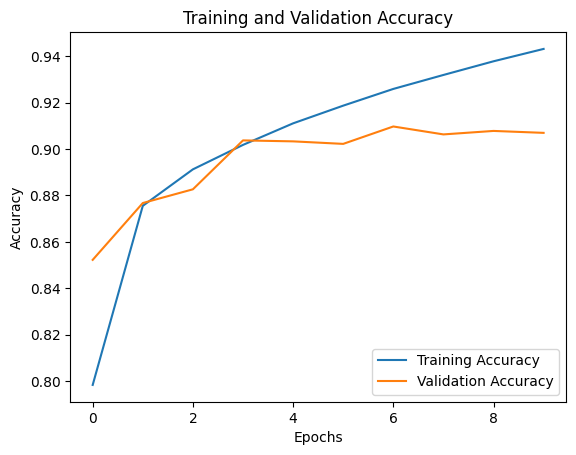

In [28]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


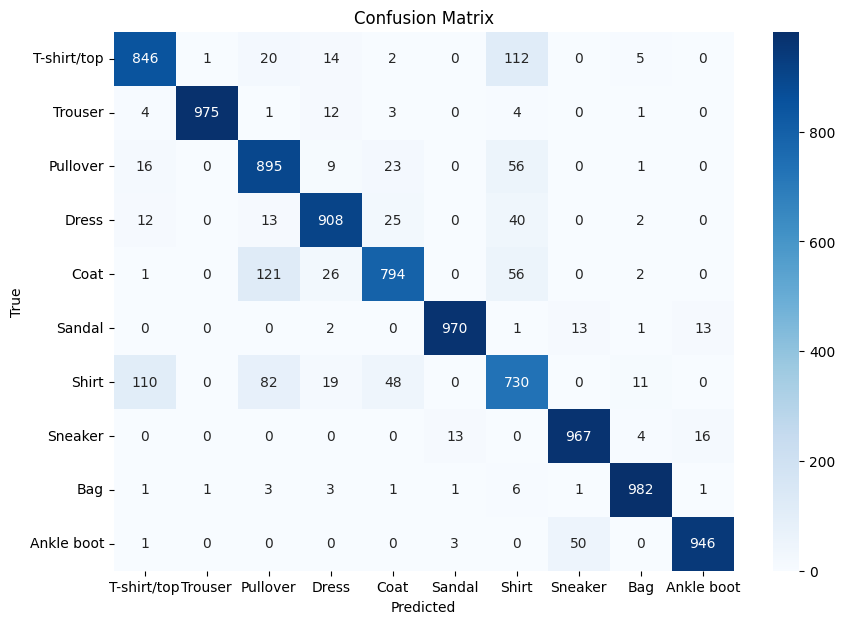

In [30]:
# Make predictions on the test data
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


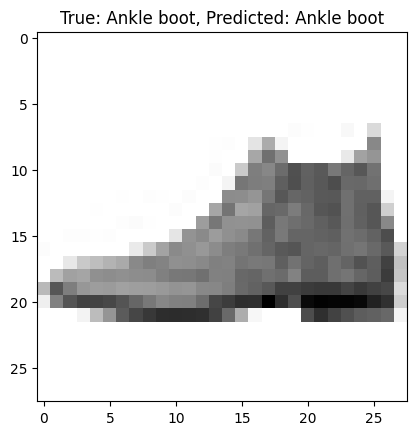

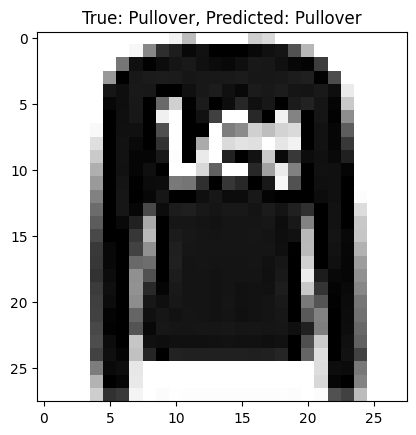

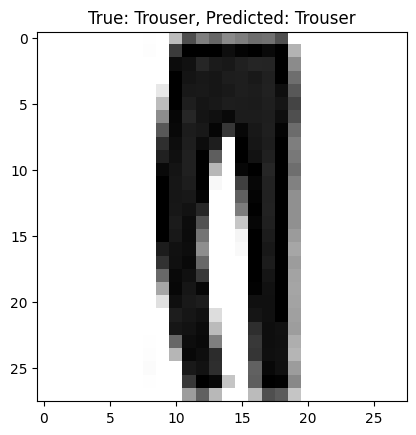

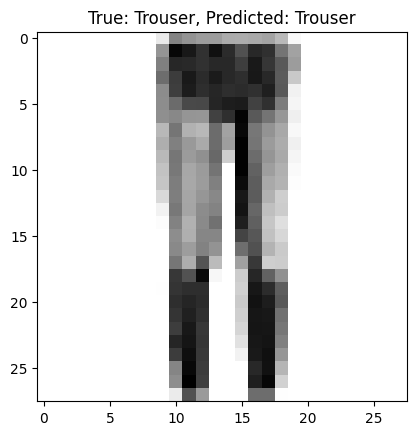

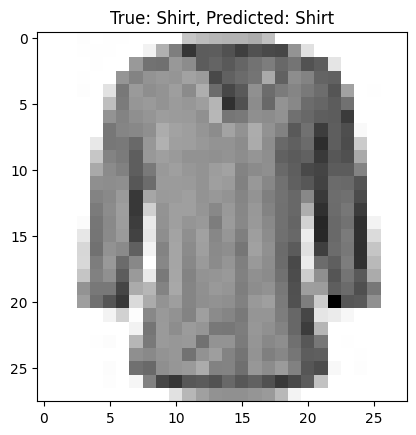

In [32]:
# Function to visualize predictions
def display_image_predictions(index):
    plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"True: {class_names[test_labels[index]]}, Predicted: {class_names[predicted_classes[index]]}")
    plt.show()

# Display sample predictions
for i in range(5):
    display_image_predictions(i)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


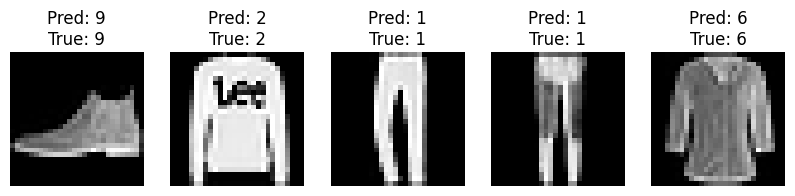

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Make predictions
predictions = model.predict(test_images)

# Get the predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Plot 5 images with their predicted and actual labels
def plot_images(images, labels, predicted_labels, num=5):
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i], cmap='gray')  # Display the image in grayscale
        plt.title(f'Pred: {predicted_labels[i]}\nTrue: {labels[i]}')
        plt.axis('off')
    plt.show()

# Call the function to plot images
plot_images(test_images, test_labels, predicted_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


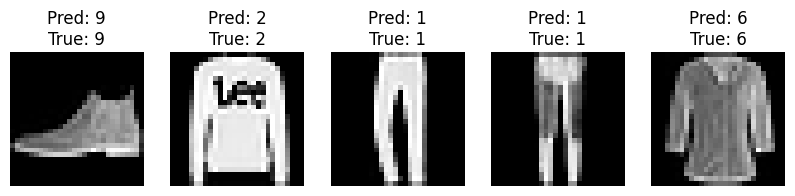

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Make predictions
predictions = model.predict(test_images)

# Get the predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Plot 5 images with their predicted and actual labels
def plot_images(images, labels, predicted_labels, num=5):
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i], cmap='gray')  # Display the image in grayscale
        plt.title(f'Pred: {predicted_labels[i]}\nTrue: {labels[i]}')
        plt.axis('off')
    plt.show()

# Call the function to plot images
plot_images(test_images, test_labels, predicted_classes)


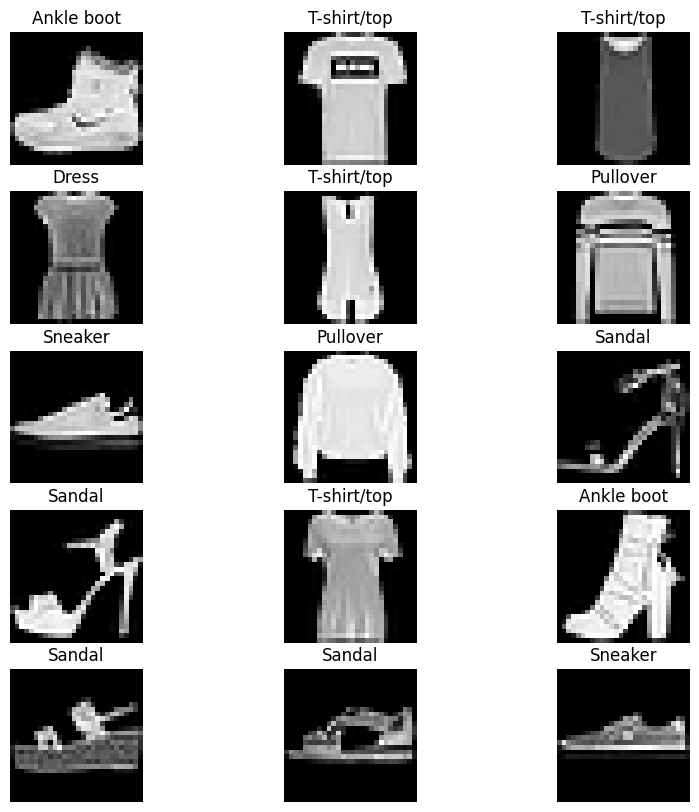

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plotting the first 15 images from the training set
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 3, i + 1)
    plt.imshow(train_images[i], cmap='gray')  # Display the image in grayscale
    plt.title(class_names[train_labels[i]])  # Set the title to the corresponding class name
    plt.axis('off')  # Turn off axis labels
plt.show()
